In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('World_happiness.csv')

# Display the first few rows of the dataset
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# Selecting relevant features for clustering
features = data[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].copy()

# Handling missing values by dropping them and creating a new DataFrame
features = features.dropna().copy()

# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


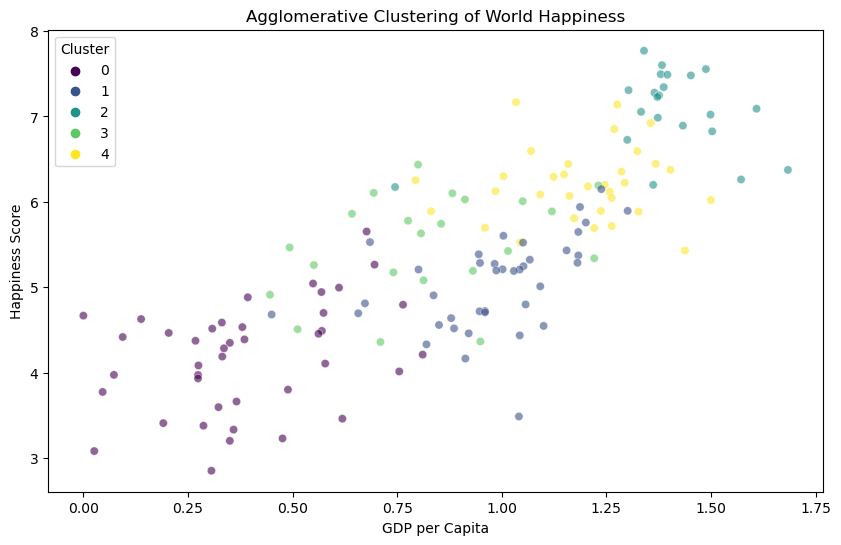

In [4]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Applying Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
data['Agglo_Cluster'] = agglo.fit_predict(scaled_features)

# Visualizing the clusters using 'GDP per capita' vs. 'Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GDP per capita'], y=data['Score'], hue=data['Agglo_Cluster'], palette='viridis', alpha=0.6)
plt.title('Agglomerative Clustering of World Happiness')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Cluster')
plt.show()


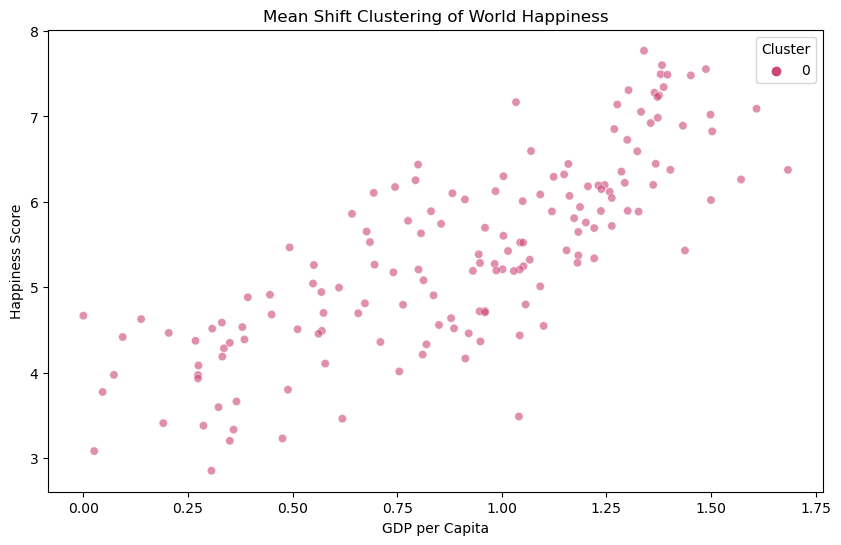

In [5]:
from sklearn.cluster import MeanShift

# Applying Mean Shift
mean_shift = MeanShift()
data['MeanShift_Cluster'] = mean_shift.fit_predict(scaled_features)

# Visualizing the Mean Shift clusters using 'GDP per capita' vs. 'Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GDP per capita'], y=data['Score'], hue=data['MeanShift_Cluster'], palette='plasma', alpha=0.6)
plt.title('Mean Shift Clustering of World Happiness')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Cluster')
plt.show()


In [7]:
# Step 6: Analyzing the Results
# Grouping by Agglomerative clusters and selecting only numeric columns
agglo_summary = data.groupby('Agglo_Cluster')[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].mean()
print("Agglomerative Cluster Summary:\n", agglo_summary)

# Grouping by Mean Shift clusters and selecting only numeric columns
mean_shift_summary = data.groupby('MeanShift_Cluster')[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].mean()
print("\nMean Shift Cluster Summary:\n", mean_shift_summary)


Agglomerative Cluster Summary:
                   Score  GDP per capita  Social support  \
Agglo_Cluster                                             
0              4.188439        0.389488        0.849610   
1              5.047923        0.982359        1.219231   
2              7.063136        1.393409        1.498636   
3              5.493591        0.825045        1.285091   
4              6.208250        1.191125        1.404656   

               Healthy life expectancy  Freedom to make life choices  \
Agglo_Cluster                                                          
0                             0.403317                      0.317976   
1                             0.756000                      0.283205   
2                             0.979273                      0.555636   
3                             0.741864                      0.493136   
4                             0.914156                      0.440188   

               Generosity  Perceptions of corrupt